Probability theory is based on the fact that sample averages converge to their expectation. 

The weak law of larges numbers asserts that the sample mean ($\bar{X}$) of a large number of independent identically distributed (iid) random variables is very close to the true (population) mean ($\mu$), with high probability.

In repeated independent test with the same actual probability *p* of a particular outcome in each test, the chance that the fraction of times that outcome differs from *p* converges to zero as the number of trials goes to infinity

$
\begin{align}
P\left(\left | \bar{X^{n}} - \mu\right | \geq \epsilon \right )\leq \frac{\sigma^{2}}{\epsilon ^{2}}\cdot \frac{1}{n}
\end{align}
$

How many samples do we need to look at in order to have a justified confidence that something that is true about the population of samples is also true about the population from which the samples were drawn? That depends upon the variance in the underlying distribution, we measure the amount of variance in the outcomes of multiple trials.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random, pylab

In [3]:
def stdDev(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return (tot/len(X))**0.5


In [4]:
def flip(numFlips):
    heads = 0.0
    for i in range(numFlips):
        if random.random() < 0.5:
            heads += 1.0
    return heads/numFlips

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

In [5]:
def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of '
                + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    xmin, xmax = pylab.xlim()
    ymin, ymax = pylab.ylim()
    pylab.text(0.60, (ymax-ymin)/1.3,
               'Mean = ' + str(round(mean, 4))
               + '\nSD = ' + str(round(sd, 4)), fontsize = 12)

def makePlots(numFlips1, numFlips2, numTrials):
    
#   #set line width
#   pylab.rcParams['lines.linewidth'] = 1
#   #set font size for titles 
#   pylab.rcParams['axes.titlesize'] = 15
#   #set font size for labels on axes
#   pylab.rcParams['axes.labelsize'] = 13
#   #set size of numbers on x-axis
#   pylab.rcParams['xtick.major.size'] = 5
#   #set size of numbers on y-axis
#   pylab.rcParams['ytick.major.size'] = 5
#   #set size of the plot
#   pylab.rcParams['figure.figsize'] = [12, 8]

    pylab.figure(figsize = (12,8))
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins = 21, edgecolor = 'gray')
    xmin,xmax = pylab.xlim()
    ymin,ymax = pylab.ylim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure(figsize = (12,8))
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins = 21, edgecolor = 'gray')
    pylab.xlim(xmin, xmax)
    ymin, ymax = pylab.ylim()
    labelPlot(numFlips2, numTrials, mean2, sd2)

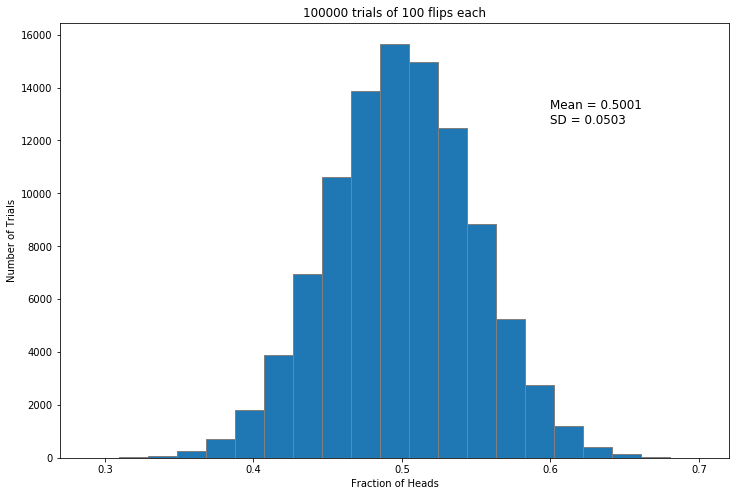

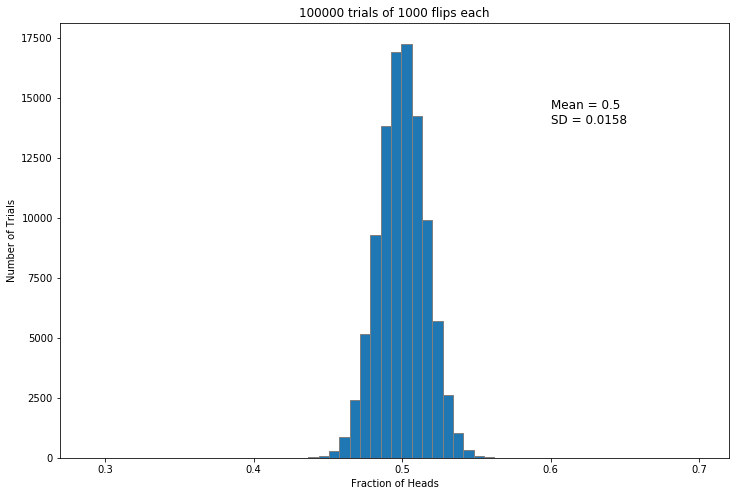

In [6]:
makePlots(100,1000,100000)
pylab.show()

In [7]:
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return numHeads, numTails


In [22]:
def flipPlot(minExp, maxExp, numTrials):
    
#   #set line width
#   pylab.rcParams['lines.linewidth'] = 1
#   #set font size for titles 
#   pylab.rcParams['axes.titlesize'] = 15
#   #set font size for labels on axes
#   pylab.rcParams['axes.labelsize'] = 13
#   #set size of numbers on x-axis
#   pylab.rcParams['xtick.major.size'] = 5
#   #set size of numbers on y-axis
#   pylab.rcParams['ytick.major.size'] = 5
#   #set size of the plot
#   pylab.rcParams['figure.figsize'] = [12, 8]
    
    meanRatios = []
    meanDiffs = []
    ratiosSDs =  []
    diffsSDs =  []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        meanRatios.append(sum(ratios)/numTrials)
        meanDiffs.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    pylab.figure(figsize = (12,8))
    pylab.plot(xAxis, meanRatios, 'ro')
    pylab.axhline(y =1, color='black', ls=':')
    pylab.title('Mean Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Mean Heads/Tails')
    pylab.semilogx()
    pylab.figure(figsize = (12,8))
    pylab.plot(xAxis, ratiosSDs, 'bo')
    pylab.title('SD Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Standard Deviation')
    pylab.semilogx()
    pylab.semilogy()


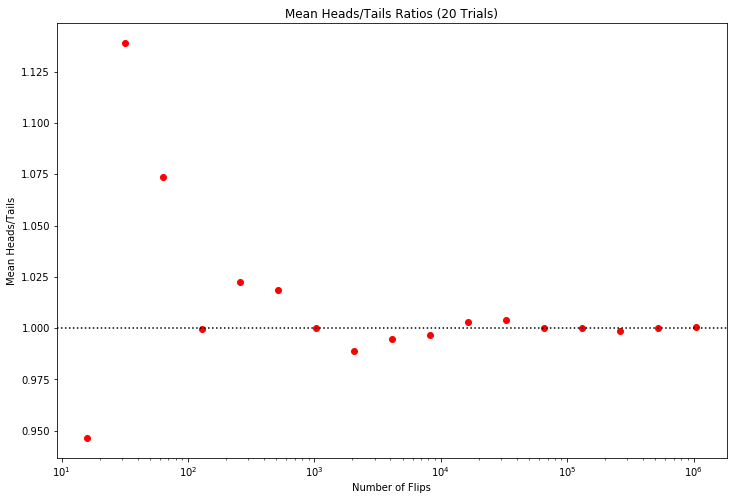

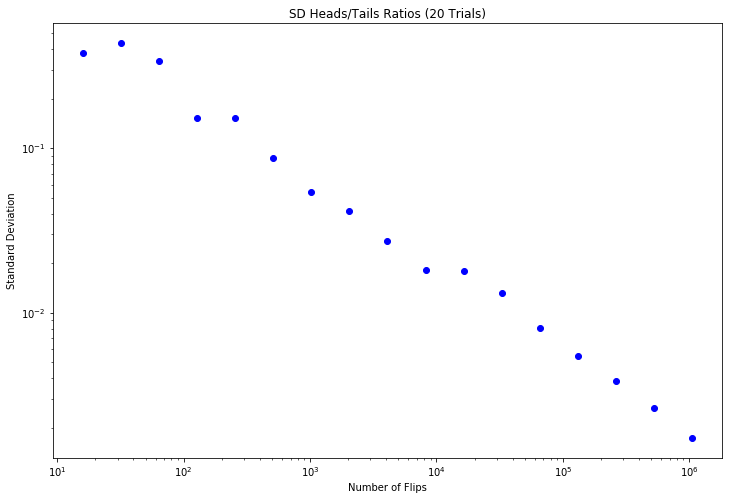

In [28]:
flipPlot(4, 20, 20)
pylab.show()


In [8]:
def flipPlot(minExp, maxExp, numTrials):
    
#   #set line width
#   plt.rcParams['lines.linewidth'] = 1
#   #set font size for titles 
#   plt.rcParams['axes.titlesize'] = 15
#   #set font size for labels on axes
#   plt.rcParams['axes.labelsize'] = 13
#   #set size of numbers on x-axis
#   plt.rcParams['xtick.major.size'] = 5
#   #set size of numbers on y-axis
#   plt.rcParams['ytick.major.size'] = 5
#   #set size of the plot
#   plt.rcParams['figure.figsize'] = [12, 8]
    
    meanRatios = []
    meanDiffs = []
    ratiosSDs =  []
    diffsSDs =  []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios = []
        diffs = []
        for t in range(numTrials):
            numHeads, numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads - numTails))
        meanRatios.append(sum(ratios)/numTrials)
        meanDiffs.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
    plt.figure(figsize = (12,8))
    plt.plot(xAxis, meanRatios, 'ro')
    plt.axhline(y =1, color='black', ls=':')
    plt.title('Mean Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    plt.xlabel('Number of Flips')
    plt.ylabel('Mean Heads/Tails')
    plt.semilogx()
    plt.figure(figsize = (12,8))
    plt.plot(xAxis, ratiosSDs, 'bo')
    plt.title('SD Heads/Tails Ratios ('
                + str(numTrials) + ' Trials)')
    plt.xlabel('Number of Flips')
    plt.ylabel('Standard Deviation')
    plt.semilogx()
    plt.semilogy()


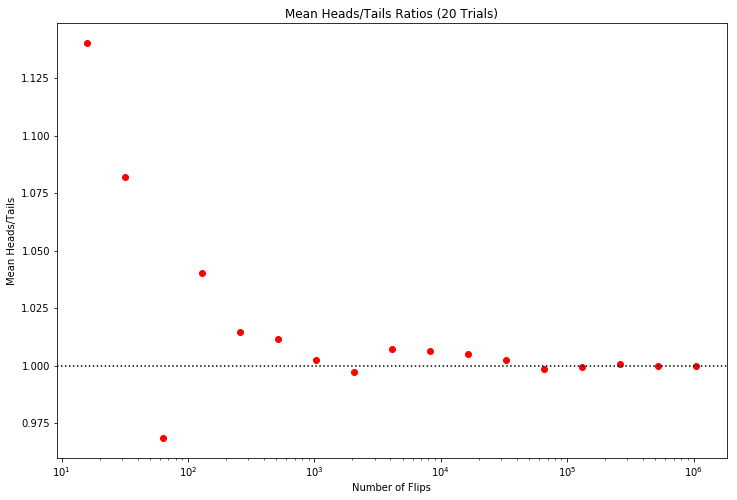

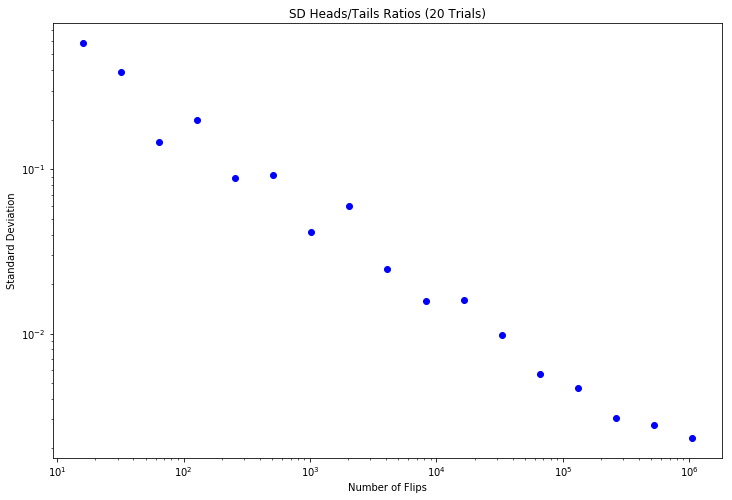

In [9]:
flipPlot(4, 20, 20)
plt.show()

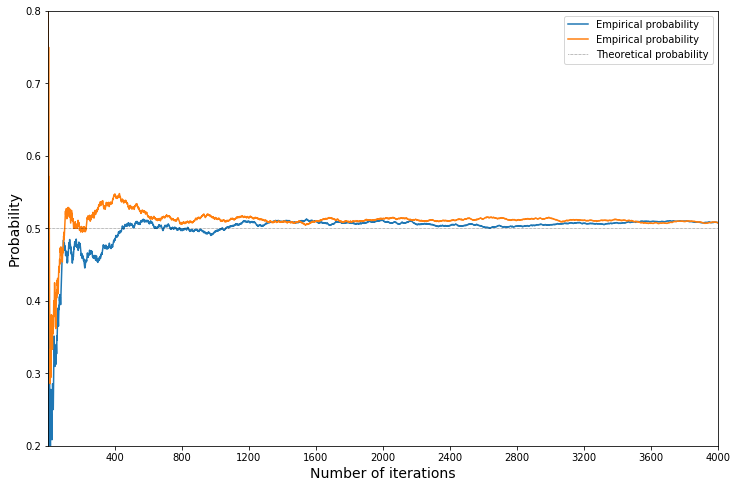

In [10]:
for simulations in range(0, 2):
    count = 0
    tosses = np.random.randint(2, size=4000)
    P_heads = []
    
    for i in range(1, 4001):
        index1 = [j for j in range(0, i) if tosses[j] == 1]
        P_heads.append(len(index1) / i)
        
    plt.xlabel('Number of iterations', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    plt.plot(np.arange(1, 4001), P_heads[0:4000], label = 'Empirical probability')
    #plt.semilogx()
    plt.gcf().set_size_inches(12, 8)
    plt.gca().set_xlim([1, 4000])
    plt.gca().set_ylim([0.2, 0.8])
    plt.xticks(np.arange(400, 4001, 400), fontsize=10)
    plt.yticks(fontsize=10)
plt.plot(range(0, 4000), [1 / 2] * 4000, 'k', ls = ':', linewidth=0.5, label = 'Theoretical probability')
plt.legend(fontsize=10)
plt.show()